In [15]:
import numpy as np
import pandas as pd
import random
import scipy.stats as sps
import matplotlib.pyplot as plt

random.seed(45)  

Create ID Feature with 800 samples, randomly shuffling the data points

In [16]:
n=800
f_id=list("ID"+str(i+100) for i in range(1,n+1))
random.shuffle(f_id)

Create Groups A, B and C, shuffling them

In [17]:
groups = np.repeat(['A', 'B', 'C'], repeats=[267, 267, 266])
random.shuffle(groups)

Create a randomly sampled f_1 from a normal distribution with mean 2500 and std = 300.

In [18]:
mean = 2500
std = 300
f_1 = sps.norm.rvs(mean, std, size=n)
f_1.mean()

2507.6355295818653

Create randomly sampled f_2 from a normal distribution with mean 400 and standard
deviation 15.

In [19]:
mean_2 = 400
std_2 = 15
f_2 = sps.norm.rvs(mean_2, std_2, size=n)
f_2.mean()

400.53419027371245

Create a DataFrame with previous ID, Group, f_1, f_2 Columns

In [20]:
data = pd.DataFrame({"ID":f_id,"Group":groups,"f_1":f_1,"f_2":f_2})
data['Group'].value_counts()

B    267
A    267
C    266
Name: Group, dtype: int64

Create Feature_3 using Group f_1 and f_2 

In [21]:
data['Feature_3'] = np.nan


data.loc[data['Group'] == 'A', 'Feature_3'] = 3 * data['f_1'] - 5 * data['f_2']
data.loc[data['Group'] == 'B', 'Feature_3'] = 2 * data['f_1']
data.loc[data['Group'] == 'C', 'Feature_3'] = -data['f_1'] + data['f_2']



Add sampled Additional Component  from a normal distribution wiht mean 0 and standard seviation 12. 

In [22]:
mean_3 = 0
std_3 = 12
additional_component = sps.norm.rvs(mean, std, size=n)
data['Feature_3'] += additional_component


In [23]:
data.head()

,ID,Group,f_1,f_2,Feature_3
0,ID763,C,2485.056817,381.755675,323.503000
1,ID204,C,2440.183226,403.010450,184.963409
2,ID734,C,2179.571389,415.243053,492.038198
3,ID422,B,3392.261365,423.543763,9485.403218
4,ID559,C,2825.963354,400.451132,159.195840


Samples greater than 3000 based on theoretical distribution

In [24]:
from scipy.stats import norm

mean_4 = 2500
std_dev = 300

# Z-score for 3000
z = (3000 - mean_4) / std_dev

above_3000 = 1 - norm.cdf(z)

# Estimate the number of samples greater than 3000
samples_above_3000 = round( n * above_3000)

print("Number of samples greater than 3000:", samples_above_3000)


Number of samples greater than 3000: 38


Samples which are greater than 3000

In [25]:
sum(data['f_1']>3000)

46

Mean and standard deviation of Feature_3 within each group

In [26]:
groupdata = data.groupby('Group')['Feature_3'].agg(['mean', 'std'])

print(groupdata)

              mean         std
Group                         
A      7968.718854  922.057926
B      7541.636571  682.400196
C       390.921318  434.029492


Scatterplot of Feature_3 vs f_1

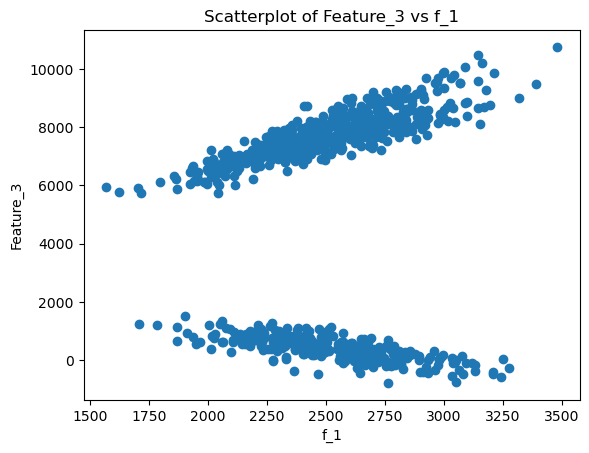

In [27]:
plt.scatter(data['f_1'], data['Feature_3'])
plt.xlabel('f_1')
plt.ylabel('Feature_3')
plt.title('Scatterplot of Feature_3 vs f_1')
plt.show()

Dumping the data frame into data.csv file.

In [28]:
data.to_csv('fake_data.csv', index=False)